In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [39]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [40]:
X_train = X_train/255
X_test = X_test/255

In [41]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [42]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [43]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [44]:
autoencoder = Sequential([encoder,decoder])

In [45]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [46]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2545 - accuracy: 0.7926 - val_loss: 0.2285 - val_accuracy: 0.7960
Epoch 2/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2016 - accuracy: 0.7956 - val_loss: 0.1774 - val_accuracy: 0.7975
Epoch 3/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1725 - accuracy: 0.7996 - val_loss: 0.1636 - val_accuracy: 0.7992
Epoch 4/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1593 - accuracy: 0.8017 - val_loss: 0.1507 - val_accuracy: 0.8051
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1473 - accuracy: 0.8045 - val_loss: 0.1407 - val_accuracy: 0.8043
Epoch 6/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1399 - accuracy: 0.8060 - val_loss: 0.1339 - val_accuracy: 0.8050
Epoch 7/10
60000/60000 [==========================

In [47]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


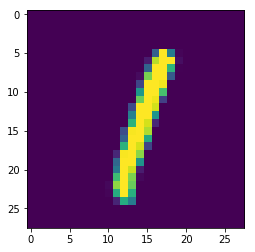

Attempted Reconstruction after encoder


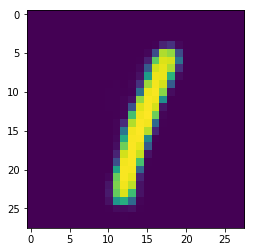

In [49]:
n=5

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction after encoder")
plt.imshow(passed_images[n])

In [51]:
from tensorflow.keras.layers import GaussianNoise

In [52]:
sample = GaussianNoise(0.2)

In [53]:
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



original


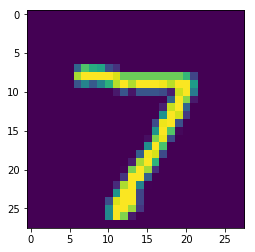

after the noise


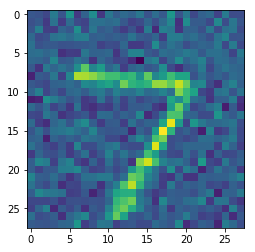

In [54]:
n = 0 
print("original")
plt.imshow(X_test[n])
plt.show()
print("after the noise")
plt.imshow(noisey[n])
plt.show()

In [57]:
import tensorflow as tf
import numpy as np

In [69]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [70]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [71]:
noise_remover = Sequential([encoder,decoder])

In [72]:
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
noise_remover.fit(X_train,X_train,epochs=8,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1683 - accuracy: 0.8013 - val_loss: 0.1332 - val_accuracy: 0.8059
Epoch 2/8
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1288 - accuracy: 0.8081 - val_loss: 0.1194 - val_accuracy: 0.8083
Epoch 3/8
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1197 - accuracy: 0.8097 - val_loss: 0.1138 - val_accuracy: 0.8101
Epoch 4/8
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1151 - accuracy: 0.8105 - val_loss: 0.1099 - val_accuracy: 0.8100
Epoch 5/8
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1118 - accuracy: 0.8110 - val_loss: 0.1075 - val_accuracy: 0.8107
Epoch 6/8
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1091 - accuracy: 0.8115 - val_loss: 0.1037 - val_accuracy: 0.8110
Epoch 7/8
60000/60000 [=============================

In [74]:
ten_noisey_images = sample(X_test[:10],training=True)

In [75]:
denoised = noise_remover(ten_noisey_images)

original image


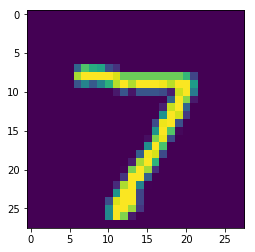

noise added image


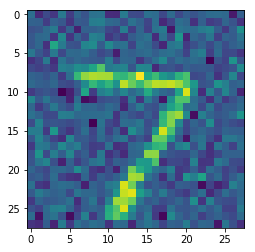

after noise removal from autoencoder


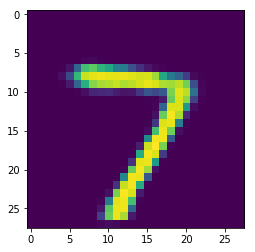

In [78]:
n = 0

print("original image")
plt.imshow(X_test[n])
plt.show()
print("noise added image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("after noise removal from autoencoder")
plt.imshow(denoised[n])
plt.show()